In [233]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [234]:
df = pd.read_csv(r"C:\Users\manju\Downloads\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [235]:
df.shape

(250, 12)

In [236]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [238]:
# Apply Stemming
# Stemming is the process of reducing a word to it's Root(or)key word

port_stem = PorterStemmer()

In [239]:

def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [240]:
df['stemmed_content'] = df['review'].apply(stemming)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,stemmed_content
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,everi quit sens includ six lot never effect fi...
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pass expert white ...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,custom address region tri near risk next girl ...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,televis loss elect small detail red son includ...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pass share must amount lot per manag world mak...


In [241]:
# Applying Tokenization and lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_content(content):
  tokenized_words = content.split()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_words]
  return ' '.join(lemmatized_words)

In [242]:
df['lemmatized_content'] = df['stemmed_content'].apply(lemmatize_content)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,stemmed_content,lemmatized_content
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,everi quit sens includ six lot never effect fi...,everi quit sen includ six lot never effect fil...
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pass expert white ...,ask develop bag also worker pas expert white a...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,custom address region tri near risk next girl ...,custom address region tri near risk next girl ...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,televis loss elect small detail red son includ...,televis loss elect small detail red son includ...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pass share must amount lot per manag world mak...,pas share must amount lot per manag world make...


In [243]:
# Checking Spelling

from spellchecker import SpellChecker

spell = SpellChecker()

def spell_check(text):
    words = text.split()
    corrected_words = [spell.correction(word) for word in words]
    return ' '.join(corrected_words)

In [244]:
df['corrected_words'] = df['lemmatized_content'].apply(spell_check)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,stemmed_content,lemmatized_content,corrected_words
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,everi quit sens includ six lot never effect fi...,everi quit sen includ six lot never effect fil...,ever quit sen include six lot never effect fil...
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pass expert white ...,ask develop bag also worker pas expert white a...,ask develop bag also worker pas expert white a...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,custom address region tri near risk next girl ...,custom address region tri near risk next girl ...,custom address region try near risk next girl ...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,televis loss elect small detail red son includ...,televis loss elect small detail red son includ...,televise loss elect small detail red son inclu...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pass share must amount lot per manag world mak...,pas share must amount lot per manag world make...,pas share must amount lot per manage world mak...


In [245]:
display(df['rating'].value_counts())

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

In [246]:
def categorize_sentiment(rating):
  if rating >= 4:
    return 'Positive'
  elif rating == 3:
    return 'Neutral'
  else:
    return 'Negative'

df['sentiment'] = df['rating'].apply(categorize_sentiment)
display(df.head())

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,stemmed_content,lemmatized_content,corrected_words,sentiment
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,everi quit sens includ six lot never effect fi...,everi quit sen includ six lot never effect fil...,ever quit sen include six lot never effect fil...,Positive
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pass expert white ...,ask develop bag also worker pas expert white a...,ask develop bag also worker pas expert white a...,Positive
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,custom address region tri near risk next girl ...,custom address region tri near risk next girl ...,custom address region try near risk next girl ...,Positive
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,televis loss elect small detail red son includ...,televis loss elect small detail red son includ...,televise loss elect small detail red son inclu...,Negative
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pass share must amount lot per manag world mak...,pas share must amount lot per manag world make...,pas share must amount lot per manage world mak...,Positive


In [247]:
#from sklearn.preprocessing import LabelEncoder

# List of categorical columns
#categorical_cols = ['platform', 'language', 'location', 'verified_purchase',
                     #'title', 'corrected_words','sentiment','username']	

# Initialize LabelEncoder
#le = LabelEncoder()

# Apply encoding
#for col in categorical_cols:
    #df[col] = le.fit_transform(df[col])

In [248]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,stemmed_content,lemmatized_content,corrected_words,sentiment
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,everi quit sens includ six lot never effect fi...,everi quit sen includ six lot never effect fil...,ever quit sen include six lot never effect fil...,Positive
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pass expert white ...,ask develop bag also worker pas expert white a...,ask develop bag also worker pas expert white a...,Positive
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,custom address region tri near risk next girl ...,custom address region tri near risk next girl ...,custom address region try near risk next girl ...,Positive
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,televis loss elect small detail red son includ...,televis loss elect small detail red son includ...,televise loss elect small detail red son inclu...,Negative
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pass share must amount lot per manag world mak...,pas share must amount lot per manag world make...,pas share must amount lot per manage world mak...,Positive


In [249]:
display(df['rating'].value_counts())

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

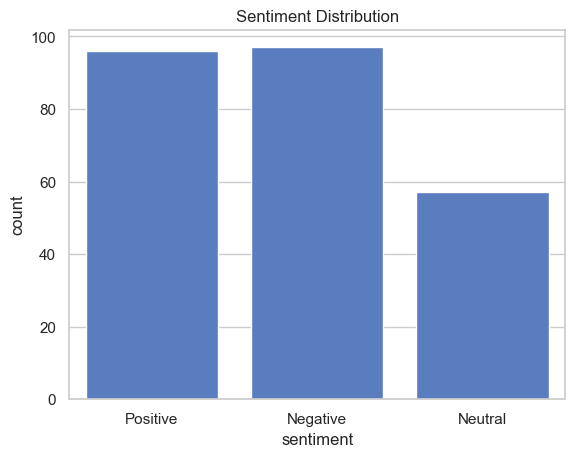

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

### EDA

C:\Users\manju\AppData\Local\Temp\ipykernel_23136\2175085702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm')


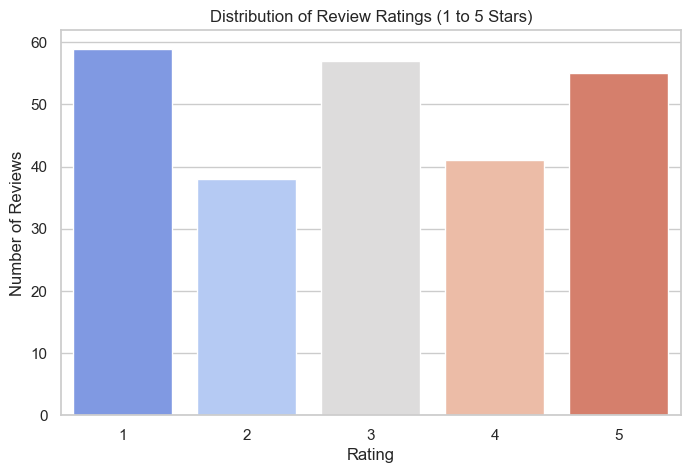

In [251]:
## 📊 1. What is the distribution of review ratings?

import seaborn as sns
import matplotlib.pyplot as plt

# Set up visualization style
sns.set(style="whitegrid", palette="muted")

# 1️⃣ Distribution of Review Ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title('Distribution of Review Ratings (1 to 5 Stars)')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

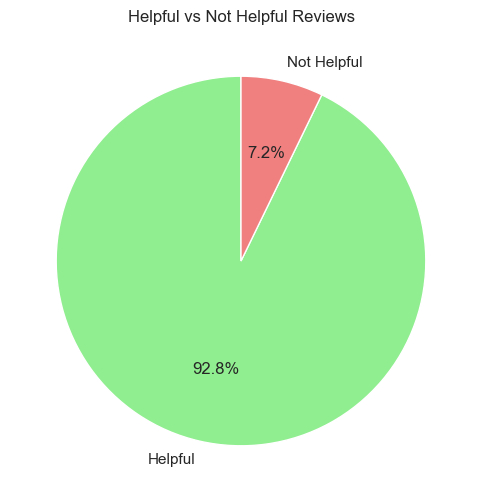

In [252]:

# 👍👎 2. How many reviews were marked as helpful (above a certain threshold)?

# Helpful Reviews Count (Threshold > 10)
if 'helpful_votes' in df.columns:
    df['helpful'] = df['helpful_votes'].apply(lambda x: 'Helpful' if x > 10 else 'Not Helpful')
    helpful_counts = df['helpful'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(helpful_counts, labels=helpful_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral'])
    plt.title('Helpful vs Not Helpful Reviews')
    plt.show()

In [253]:
 # 🧭 3. What are the most common keywords in positive vs. negative reviews?


C:\Users\manju\AppData\Local\Temp\ipykernel_23136\275126111.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rating_over_time = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()


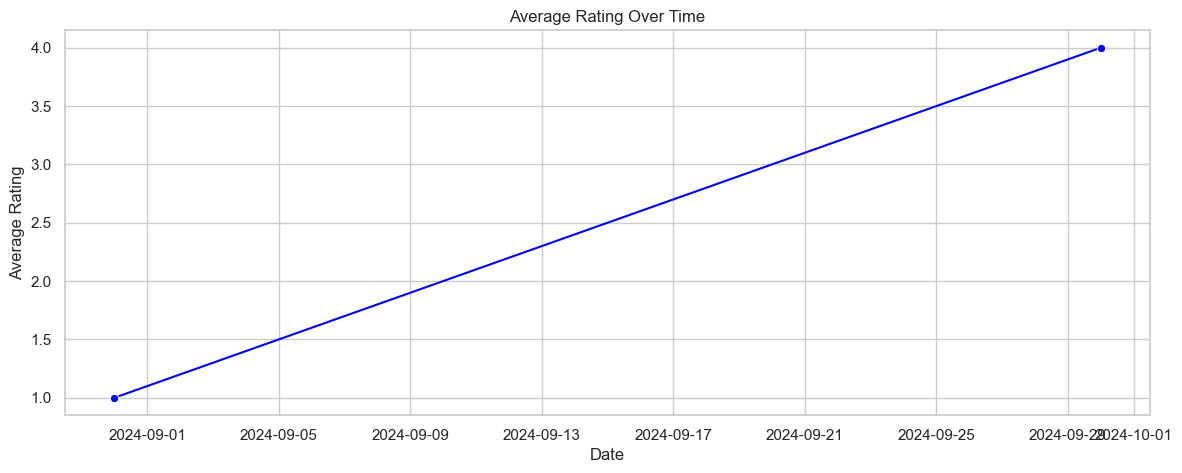

In [254]:
 # 📆 4. How has the average rating changed over time?


# Average Rating Over Time
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    rating_over_time = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()
    plt.figure(figsize=(14,5))
    sns.lineplot(x='date', y='rating', data=rating_over_time, marker='o', color='blue')
    plt.title('Average Rating Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.show()

C:\Users\manju\AppData\Local\Temp\ipykernel_23136\1929189715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='rating', data=loc_data, estimator='mean', palette='viridis')


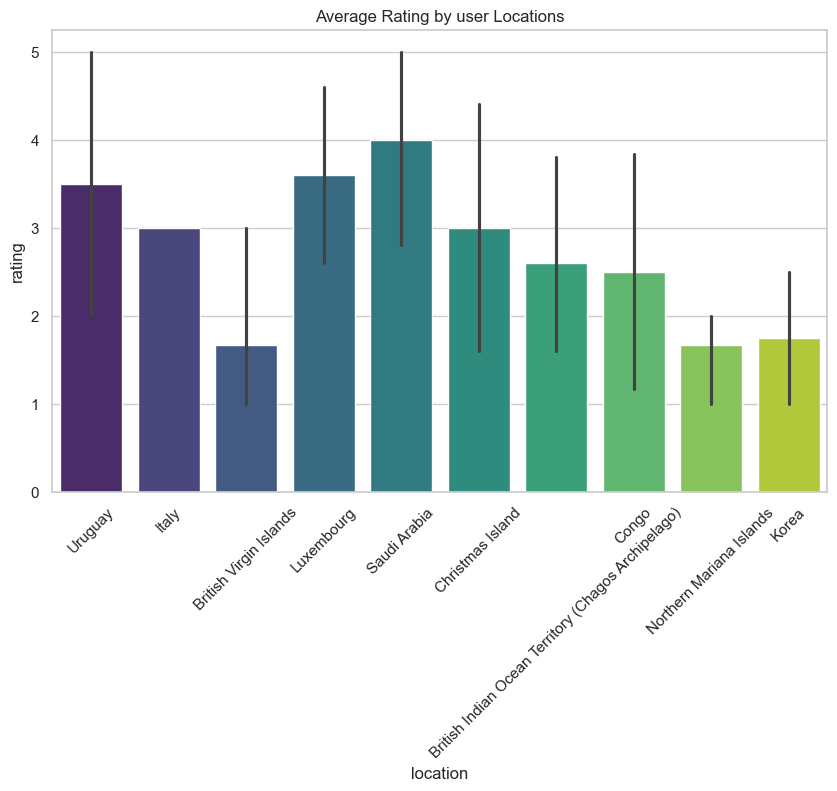

In [255]:
## 🌍 5. How do ratings vary by user location?

#Ratings by User Location
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(10).index
    loc_data = df[df['location'].isin(top_locations)]
    plt.figure(figsize=(10,6))
    sns.barplot(x='location', y='rating', data=loc_data, estimator='mean', palette='viridis')
    plt.title('Average Rating by user Locations')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\manju\AppData\Local\Temp\ipykernel_23136\1977062723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=df, estimator='mean', palette='coolwarm')


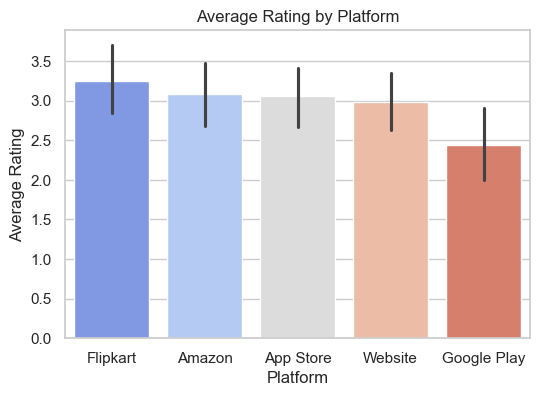

In [256]:
# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
# Ratings by Platform
if 'platform' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='platform', y='rating', data=df, estimator='mean', palette='coolwarm')
    plt.title('Average Rating by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Average Rating')
    plt.show()

C:\Users\manju\AppData\Local\Temp\ipykernel_23136\389396919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', palette='Set2')


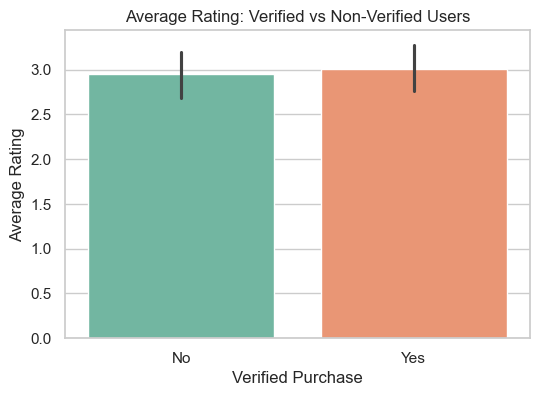

In [257]:
# ✅❌ 7. Are verified users more satisfied than non-verified ones?
# Verified vs Non-Verified Users
if 'verified_purchase' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', palette='Set2')
    plt.title('Average Rating: Verified vs Non-Verified Users')
    plt.xlabel('Verified Purchase')
    plt.ylabel('Average Rating')
    plt.show()


In [258]:
display(df['rating'].value_counts())

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

C:\Users\manju\AppData\Local\Temp\ipykernel_23136\3722417774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='Blues')


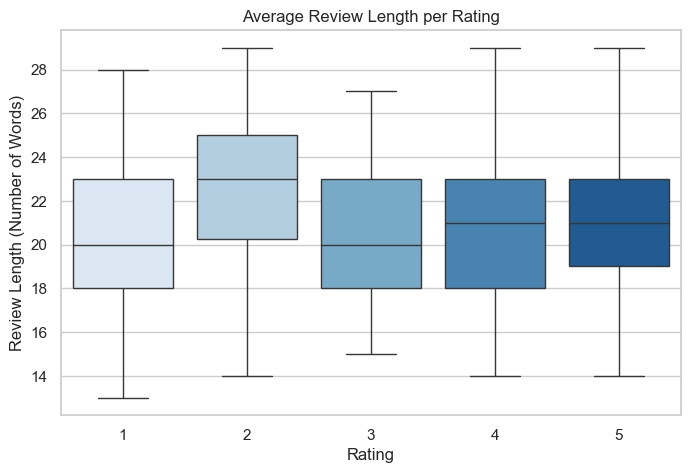

In [ ]:
# 🔠 8. What’s the average length of reviews per rating category?

# Average Review Length per Rating
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='review_length', data=df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Number of Words)')
plt.show()

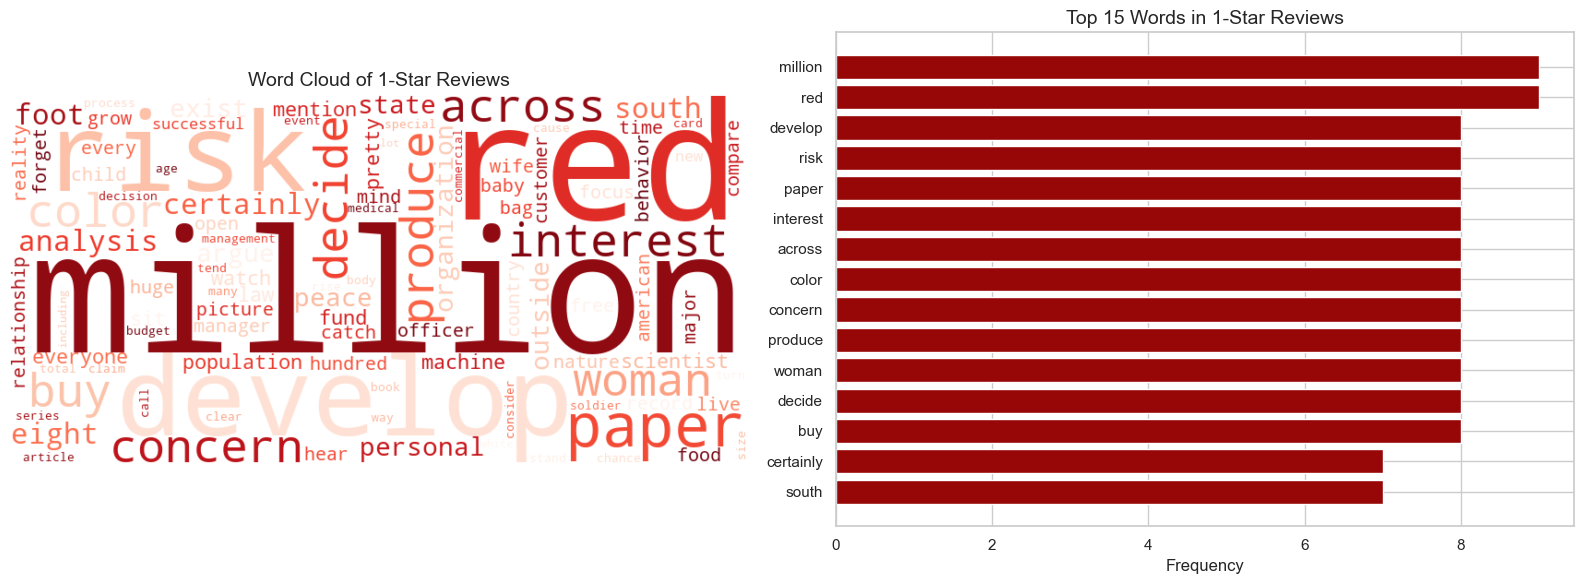

In [278]:
# 💬 9. What are the most mentioned words in 1-star reviews?

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Extract and clean 1-star reviews
one_star_reviews = df[df['rating'] == 1]['review'].dropna().str.lower().tolist()

# Join into single text
text = " ".join(one_star_reviews)

# Basic cleanup (remove punctuation/numbers)
text = re.sub(r"[^a-z\s]", "", text)

# Tokenize
words = text.split()

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "use", "one"])  # add custom removals

# Filter words
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]

# --- Word Cloud ---
wordcloud = WordCloud(
    width=800, height=400, background_color="white",
    colormap="Reds", max_words=100, stopwords=stopwords
).generate(" ".join(filtered_words))

# --- Bar Chart (Top 15 words) ---
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(15)
words_df = pd.DataFrame(common_words, columns=["word", "count"])

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: WordCloud
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud of 1-Star Reviews", fontsize=14)

# Right: Bar chart
axes[1].barh(words_df["word"], words_df["count"], color="#980707")
axes[1].invert_yaxis()  # largest on top
axes[1].set_title("Top 15 Words in 1-Star Reviews", fontsize=14)
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

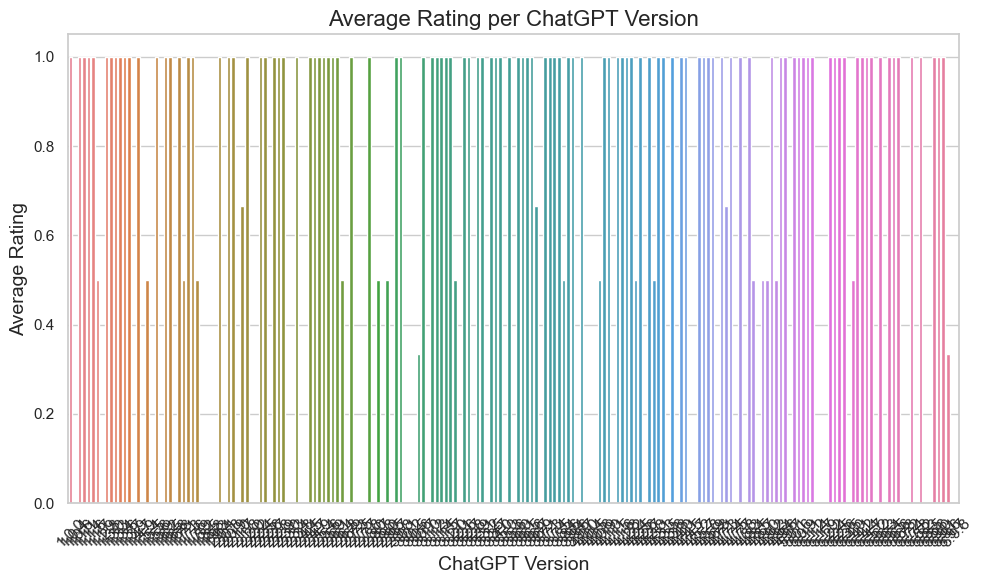

In [279]:
# 📱🧪 10. What ChatGPT version received the highest average rating?


# Calculate average rating per version
avg_ratings = df.groupby('version')['rating'].mean().reset_index()

# Set seaborn style
sns.set(style='whitegrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='version',
    y='rating',
    hue='version',         # tell seaborn: color by version
    data=avg_ratings,
    palette='husl',
    legend=False           # avoid duplicate legend
)
plt.title('Average Rating per ChatGPT Version', fontsize=16)
plt.xlabel('ChatGPT Version', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [260]:
df['rating'] = df['rating'].apply(lambda x: 0 if x in [1, 2] else 1)
df['rating'].value_counts()

rating
1    153
0     97
Name: count, dtype: int64

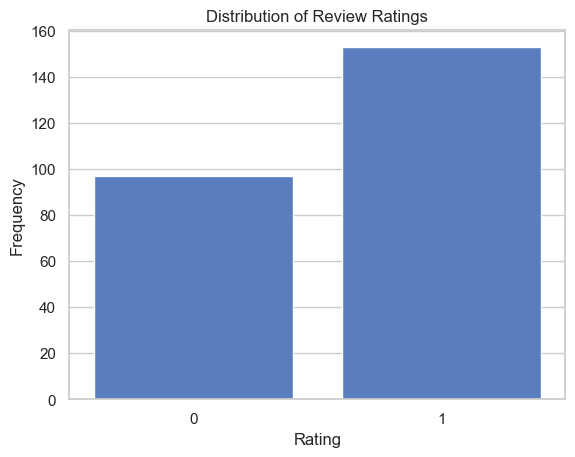

In [261]:
# Distribution of review ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Logistic Regression

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [266]:
# Separating target and feature

X = df['corrected_words'].astype(str).values
Y = df['rating'].values

In [267]:
# Splitting train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [268]:
# Convert the textual values to numerical values

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [269]:
# Training the model
# Logisticregression

model = LogisticRegression(max_iter=1000,class_weight='balanced')

In [270]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [271]:
# Accuracy for training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy for training data: ', training_data_accuracy)

Accuracy for training data:  1.0


In [272]:
# Accuracy for testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy for testing data: ', testing_data_accuracy)

Accuracy for testing data:  0.64


In [273]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        19
           1       0.71      0.71      0.71        31

    accuracy                           0.64        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.64      0.64      0.64        50



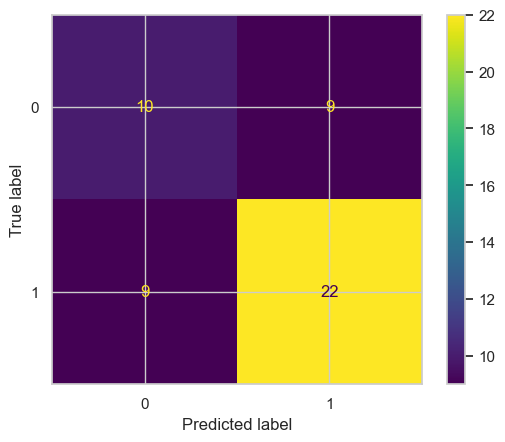

In [274]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [275]:
import pickle

# Save the trained Random Forest model to a pickle file
filename = 'logistic_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [276]:
import pickle

# Save the fitted TfidfVectorizer to a pickle file
filename = 'tfidf_vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))